# Investing During A Pandemic

>A tutorial in exploratory data analysis to find the best stock during the pandemic.

- toc: false
- badges: true
- comments: true
- categories: [eda, r, exploratory data analysis, data cleaning, charts]
- image: images/chart-going-up1.jpg

## Introduction

Welcome to my financial analytic project, which I have used to find the stock with the best fundamentals in and coming out of the pandemic. I will be using a variety of metrics to seek this goal; Multiples, Projected Sales Growth, Revenue, Market Cap, Net Margin, and Returns. Since this project is based on investing throughout the pandemic, we will be using the time frame of the March lows (3/23/2020) and the Pfizer vaccine approval date (11/18/2020). I choose the March low 3/23/20 since this is generally the bottom for most equities as this was the moment the FED and U.S. Government was able to put the floor in the stock market through fiscal policy and monetary policy. Of course, this project has a bias toward the tail end of the time frame as the market is often irrational and forward-thinking, therefore cyclical sectors are likely to outperform secular growth sectors. Now, the pandemic is still going on unfortunately and it is likely to be around in the near-term future. However, this time frame captures the life-cycle of an investor's preferences during the different stages of a pandemic. Therefore, if we spike in cases we will see a similar trend towards the beginning of our research, where we see secular sectors outperform, and as cases trend lower with vaccines rolling out we will see cyclical sectors outperform. We are likely to see similar trends take place in the future, as we have seen in the sample of time taken in this project and that's why I feel comfortable with the time frame. I will be walking you through the steps taken to find this perfect stock. As a disclaimer, this “perfect stock” does not mean the best returning stock. As we see stocks with no revenues providing great returns in this current market. But, we wish to find a risk-neutral investor the perfect stock during and coming out of the pandemic. In doing so, the strongest fundamental stock will oftentimes lead to outperformance of the market benchmark (S&P 500) and its peers.

#### Definitions of Financial Terms:

Market Cap / Revenue (TTM): A form of valuation multiple used to judge what investors are willing to pay for revenues.

Projected Sales Growth: A consensus of Analyst's sales forecasts for next year's revenues.

Market Cap: Total dollar market value of all outstanding shares.

Revenue: The income generated from normal business operations.

Net Margin: A ratio of net profits to revenues for a company.


### First Step: Read in First Data Source

I have decided to not include the code related to loading in packages as it takes up too much space and we want to get right into the content. However, I will provide the packages included here (Tidyverse, Readxl, Ggplot2, Dplyr, Plotly, Ggrepel, Quantmod). These packages allow me to read, manipulate, and visualize data in different ways. The first data source I will be reading into R is the performance of several sector SPDR ETFs from the March lows to the Vaccine Approval date. I took this data from Yahoo Finance.

In [1]:
#hide
#Load Package
library(tidyverse)
library(readxl)
library(ggplot2)
library(dplyr)
library(quantmod)
library(ggrepel)

In [2]:
#Read in Data Set
ETF_Performance <- read_excel("C:/Users/Admin/Downloads/ETF_Performance.xlsx", col_types = c("text", "numeric", "numeric", "skip", "skip", "skip", "skip", "skip", "skip", "skip", "skip", "skip"))
print(ETF_Performance)

# A tibble: 11 x 3
   Sectors `3_23_2020` `11_18_2020`
   <chr>         <dbl>        <dbl>
 1 XLC            40.3         63.6
 2 XLY            87.5        154. 
 3 XLP            48.6         66.7
 4 XLE            27.4         35.4
 5 XLF            17.7         28.9
 6 XLV            74.6        109. 
 7 XLI            47.7         87.2
 8 XLB            38.4         69.5
 9 XLRE           25.5         37.1
10 XLK            70.4        120. 
11 XLU            44.9         64.2


### Second Step: See Which Sector Performed the Best

Next, we will need to do some cleaning and data manipulation to display the total return for each ETF from March 23rd to November 18th. We will be creating a new column called Total_Return that displays this information. Then we will need to utilize the function (sprintf) to format the column in a percentage format. This step will allow us to be able to input correct data for our graph.

In [3]:
#Calculate the total return from March 3rd, 2020 to November 18th, 2020
ETF <- ETF_Performance %>%
  rename(March_Low = `3_23_2020`, Vaccine_Approved = `11_18_2020`) %>%
  mutate(Total_Return = (Vaccine_Approved - March_Low) / March_Low) %>%
  mutate(Total_Return = sprintf("%0.1f%%", Total_Return * 100))
print(ETF)

# A tibble: 11 x 4
   Sectors March_Low Vaccine_Approved Total_Return
   <chr>       <dbl>            <dbl> <chr>       
 1 XLC          40.3             63.6 57.8%       
 2 XLY          87.5            154.  75.6%       
 3 XLP          48.6             66.7 37.2%       
 4 XLE          27.4             35.4 29.5%       
 5 XLF          17.7             28.9 63.9%       
 6 XLV          74.6            109.  46.2%       
 7 XLI          47.7             87.2 82.8%       
 8 XLB          38.4             69.5 81.3%       
 9 XLRE         25.5             37.1 45.8%       
10 XLK          70.4            120.  71.0%       
11 XLU          44.9             64.2 42.8%       


Since we have obtained the returns for each sector it is time to visualize the data to understand the best performing ETF.

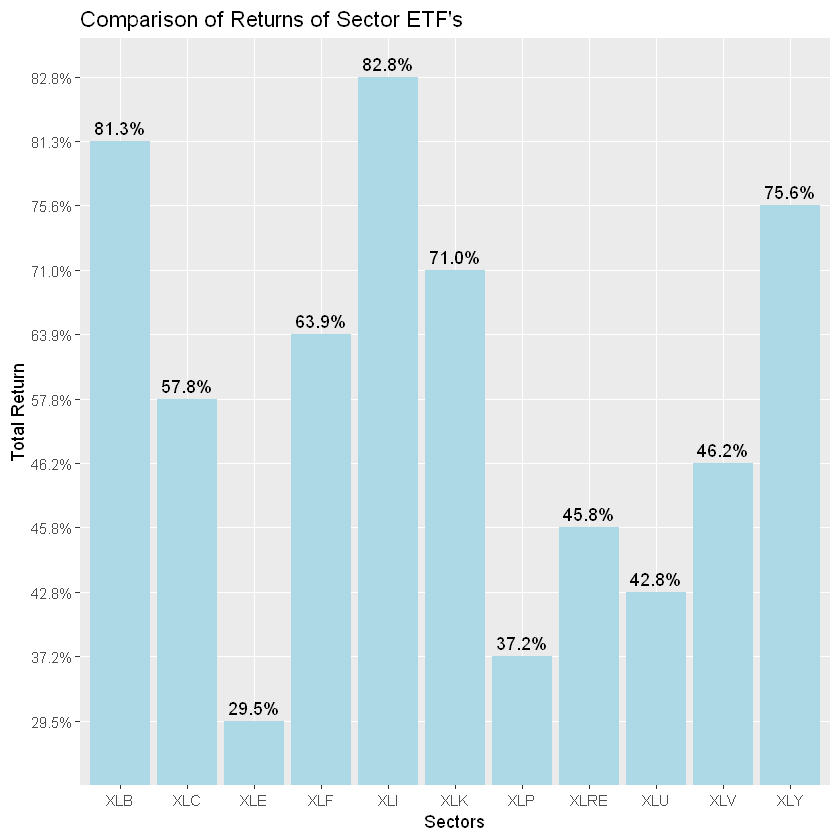

In [4]:
#Visualize the Total Returns for the Sectors
ggplot(ETF, aes(Sectors, Total_Return))+
  geom_col(fill = "light blue")+
  geom_text(aes(label = Total_Return, vjust = -0.5))+
  labs(y = "Total Return", title = "Comparison of Returns of Sector ETF's")

We can now see the XLI (Industrial) sector was the best performing sector during this time frame. We can clearly see the sectors investors should have been investing in due to the pandemic conditions (XLK, XLB, XLY, XLI). Interestingly, these sectors all performed higher than 70% returns, however, the timing of the sectors performance is vastly different.

In [5]:
#Read in Charts
Sectors <- c("XLK", "XLY", "XLI", "XLB")
getSymbols(Sectors, src = "yahoo", from = "2020-03-23", to = "2020-11-18")

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "XLK" "XLY" "XLI" "XLB"

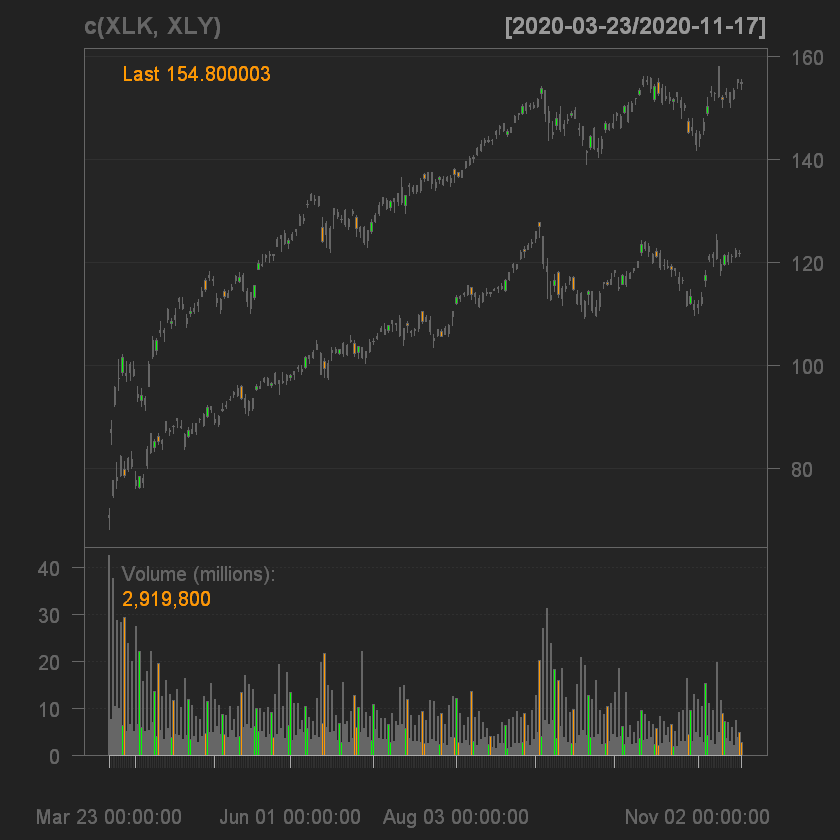

In [6]:
#Chart Secular Sectors
candleChart(x = c(XLK, XLY))

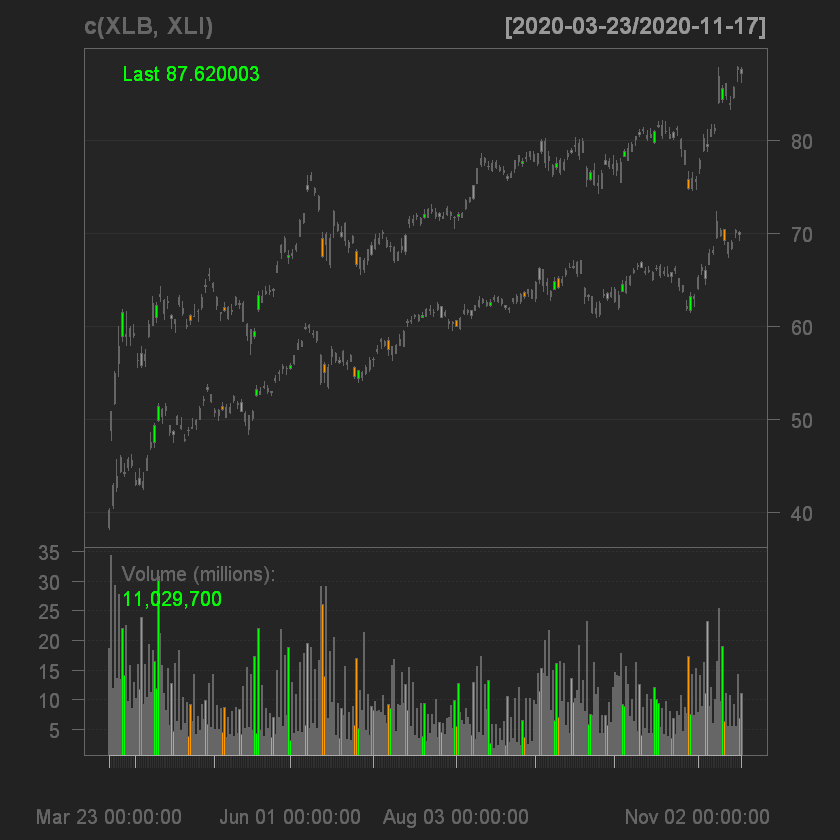

In [7]:
#Chart Cyclical Sectors
candleChart(x = c(XLB, XLI))

We see the secular sectors outperform during the beginning and middle of the pandemic as it was a requirement to utilize these companies’ offerings. The XLK (Technology) and XLY (Consumer Discretionary) have trends such as E-Commerce, Digitization, Cloud, Essential Retailers, etc. These trends are fantastic investment trends going into the future and the pandemic pulled forward a lot of growth for these companies therefore, they outperformed. The latter half of the time frame was dominated by cyclical sectors like XLI (Industrials) and XLB (Materials) as the market focused its attention on the possible reopening of the economies across the world because of the vaccine hopes. These sectors have undergone a tremendous downturn in earnings and revenues due to the pandemic, but with the economy reopening it will allow for higher revenue growth as these company’s operations revert to their mean results. 

The XLI is the best performing sector in this time frame with an 82.8% return. The Industrial sector has a lot of tailwinds as the economy is likely to bounce back and more stimulus is provided for potential infrastructure projects. The market's recent rotation into cyclical sectors may be in the early innings going into 2021. We will take a look at multiples and other sector fundamentals to understand this rotation.


### Third Step: Comparing Companies in the XLI Based on Sales Growth and Net Margin

Now we will be analyzing each company that makes up this sector to understand the underlying fundamentals of the sector. I will be neglecting to include companies with a weighting in the ETF lower than 1%. This is because most of these smaller weighted companies have smaller market caps, which results in low volume/float companies. In order to find the perfect investment, liquidity is a must, so the stock does not have drastic swings. I have gathered the information from ETF.com and Yahoo Finance. In this chunk of code, I have created a new column that represents a multiple, so we can compare the valuations of each company.

In [8]:
#Read in Data
portfolio_holdings_xli <- read_excel("C:/Users/Admin/Downloads/portfolio-holdings-xli.xls")
#Create a Valuation metric column of MKT Cap/Rev (TTM)
XLI_Real <- portfolio_holdings_xli %>%
  mutate(Multiple = Market_Cap / Revenue_TTM) %>%
  mutate(Multiple = round(Multiple, 2))
head(data.frame(XLI_Real))

Symbol,Sales_Growth,Net_Margin,Market_Cap,Revenue_TTM,March_Low,Vaccine_Approval,Return,Variable,Multiple
UPS,0.048,0.0571,150.1,80.3,91.90,168.45,0.8329706,1,1.87
RTX,0.057,-0.0314,107.5,59.7,51.72,69.51,0.3439675,1,1.80
GE,0.023,0.0471,95.3,83.9,6.11,9.73,0.5924714,1,1.14
FDX,0.048,0.0328,72.0,74.7,111.76,282.50,1.5277380,1,0.96
ETN,0.003,0.0756,46.8,18.4,57.77,116.75,1.0209451,1,2.54
NOC,0.047,0.0694,50.4,35.3,269.86,310.60,0.1509672,1,1.43


Our first visualization for this data table will feature net margin and projected sales growth for each company. We will be breaking up these two metrics in the form of quartiles, the horizontal and vertical line will represent the median for the metrics among the companies in the ETF. In theory, the highest multiple or highest investor sentiment stock should come from quartile 4. However, in recent years the stock market has valued revenue growth over profitability. Therefore we will look closely at the companies in quartile 2 as they will most likely obtain the highest return among other quartiles.

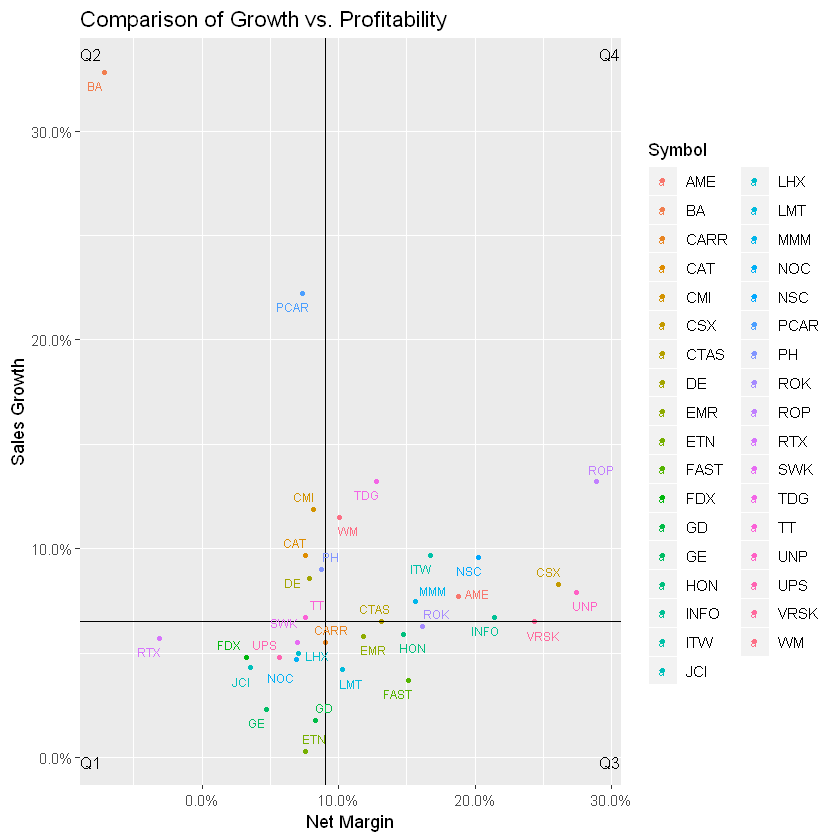

In [9]:
#Visualize XLI Holdings based on Sales Growth and Net Margin
options(ggrepel.max.overlaps = Inf)

ggplot(XLI_Real, aes(Net_Margin, Sales_Growth, color = Symbol))+
  geom_point(size = 1)+
  scale_y_continuous(labels = scales::percent)+
  scale_x_continuous(labels = scales::percent)+
  geom_vline(xintercept = median(XLI_Real$Net_Margin))+
  geom_hline(yintercept = median(XLI_Real$Sales_Growth))+
  labs(x = "Net Margin", y = "Sales Growth", title = "Comparison of Growth vs. Profitability")+
  geom_text_repel(data = XLI_Real, size = 2.5,
                          mapping = aes(x = `Net_Margin`, y = `Sales_Growth`, label = Symbol))+
  geom_text(label = "Q1", x = -0.081, y = -0.002, size = 3.5, color = "black")+
  geom_text(label = "Q2", x = -0.081, y = 0.337, size = 3.5, color = "black")+
  geom_text(label = "Q3", x = 0.299, y = -0.002, size = 3.5, color = "black")+
  geom_text(label = "Q4", x = 0.299, y = 0.337, size = 3.5, color = "black")

We do have to keep in mind the effects of Covid-19, many of these companies' net margin has taken a hit due to the pandemic slowing down operations. Therefore, we can assume by next year many of these companies can increase profitability. For example, PCAR can obtain a multiple expansion among investors if the net margin were to raise higher than the median of the sector and the stock price will rise. In doing this analysis on other sectors, we often see many quartile 2 companies are young companies because revenue/earnings have yet to mature, however when the company scales it is hard to maintain above-average sales growth, therefore companies must focus on achieving profitability to maintain multiples. In this case, many of the high growth companies are purely bounce back plays as we are coming out of lockdown. In order to justify high multiples, these companies must shift attention to profitability. 

### Step 4: Find the Highest Returning Quartile

Next, we will be looking at the returns of each quartile to see which quartile produced the best returns, high growth, high profitability, or a mix of both?

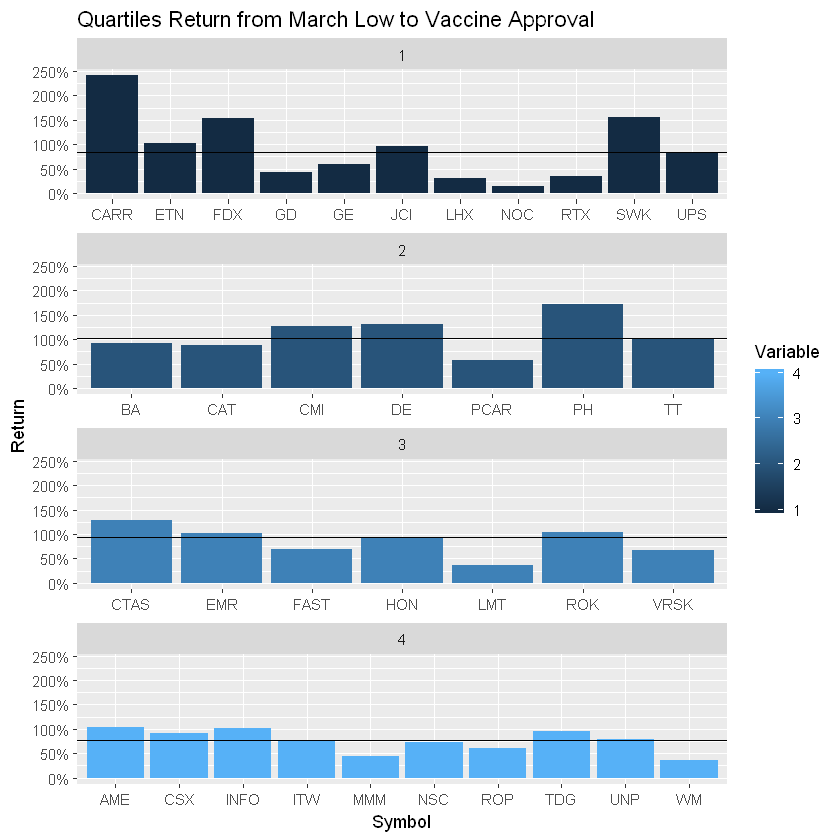

In [10]:
#Median for Return
XLI_Median <- XLI_Real %>%
  group_by(Variable) %>%
  summarise(median_val = median(Return))

#Visualize Returns of each quartile
ggplot() + 
  geom_col(data = XLI_Real,
            aes(x = Symbol, y = Return, fill = Variable)) +
  scale_y_continuous(labels = scales::percent)+
  facet_wrap(~Variable, ncol = 1, scales = "free_x")+
  geom_hline(data = XLI_Median, aes(yintercept = median_val))+
  labs(title = "Quartiles Return from March Low to Vaccine Approval")

Our theory on the market valuing growth over profitability is correct, with quartile 2 having the highest return of 102%. It is interesting to see quartile 4, which has both high growth and high profitability come in last with 76% returns. quartile 1 and quartile 3 come in at 83% and 93% respectively. I have used median over the mean as these quartiles can be skewed by one of two stocks, therefore median mitigates the risk of one stock skewing the data with its returns.

### Step 5: Understanding Companies Valuation

We have found the highest returning quartile, which is quartile 2. Now let’s see if valuations in quartile 2 are overvalued and due for a reversion to fair value.

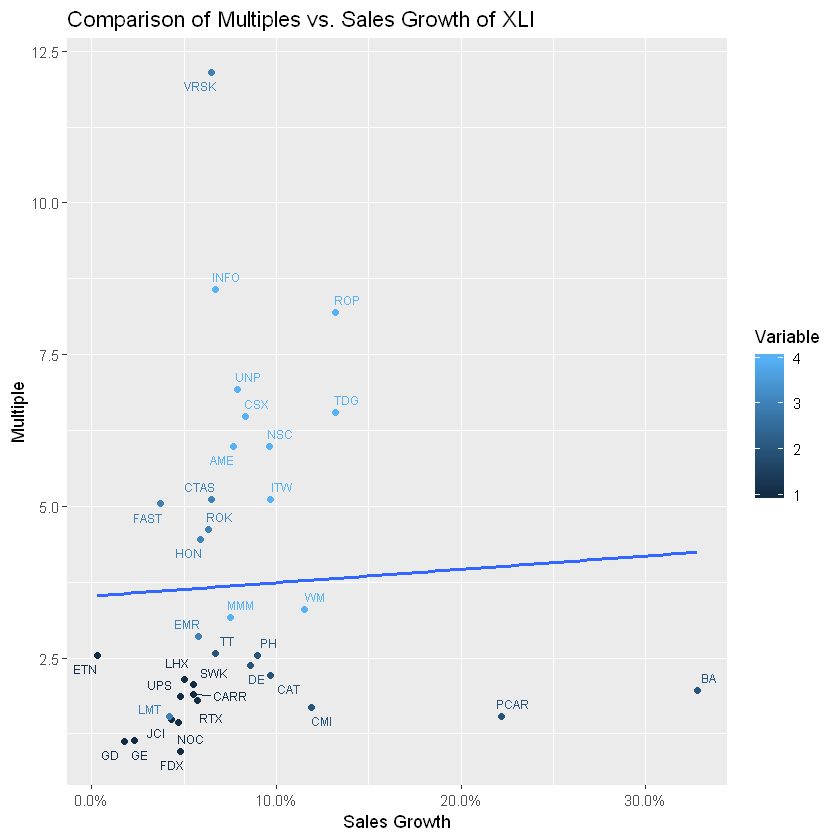

In [11]:
#Visualize Multiple with Sales Growth
ggplot(XLI_Real, aes(Sales_Growth, Multiple, color = Variable))+
  geom_point()+
  scale_x_continuous(labels = scales::percent)+
  labs(x = "Sales Growth", title = "Comparison of Multiples vs. Sales Growth of XLI")+
  geom_text_repel(data = XLI_Real, size = 2.5,
                  mapping = aes(x = `Sales_Growth`, y = `Multiple`, label = Symbol))+
  geom_smooth(method = lm, se=FALSE)

I took a linear regression of the group's multiples and sales growth to visualize a relationship between variables.

If we look at each quartile, we will see investors are willing to place quartile 4 companies with the highest multiple. Multiples do not 100% correlate with returns as quartile 4 had the worst return. The multiple is just a way to compare what investors are willing to pay for one stock rather than another. An example would be two identical companies, Company A and Company B, with the same revenue and profit. However, Company A has a subscription model and Company B has a one-time charge model. Investors could place a higher multiple on Company A because of the reliability of earnings. But, what does correlate with returns is multiple expansion or contraction. If a company's multiple is increasing while earnings are remaining the same, it is because the stock price is increasing and vise versa for a multiple decreasing. In this model, we see quartile 2 being undervalued if they can execute their projections of sales and improve profitability. 

### Step 6: Looking at Quartile 2's Revenues

Our next graph will look at Q2 company's revenue from 2016 to 2020. This is to see where revenues were in the past and see if there are any deceleration or acceleration.

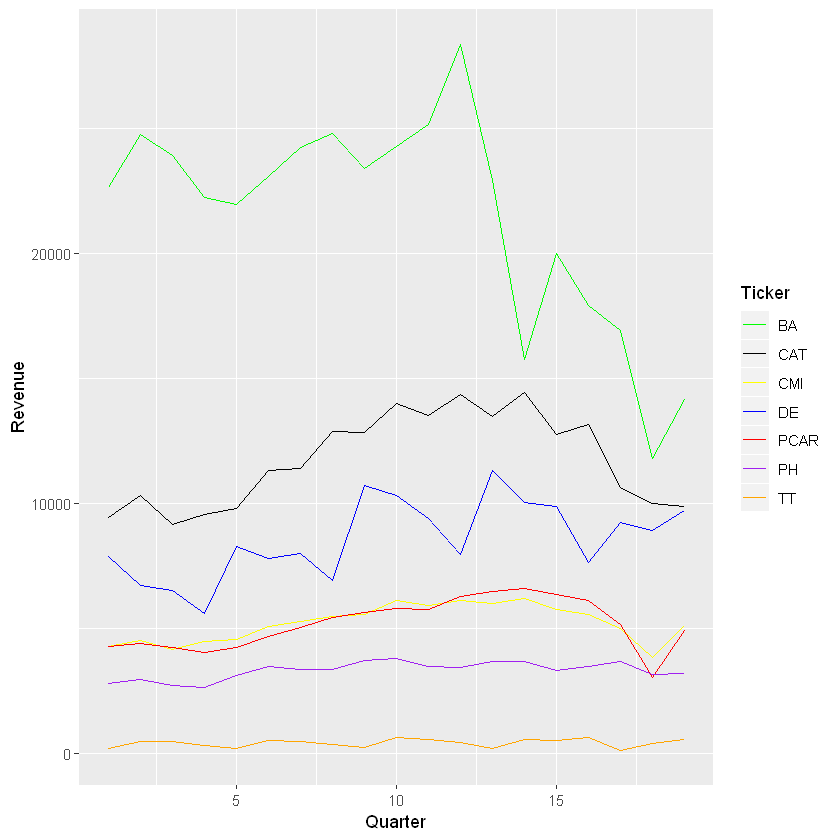

In [12]:
#Read in Data
Q_2 <- read_excel("C:/Users/Admin/Downloads/Q_2.xlsx")
#Take Highest Growth and Profitable Stocks and Chart Revenues

ggplot(Q_2, aes(x = Quarter,y = Revenue, color = Ticker)) +  
  geom_line()+
  scale_color_manual(values=c("Green","Black","Yellow","Blue","Red","Purple","Orange"))

The Pandemic begins to show its effects from Quarter 16 through the present day. Trough revenues for the group are Quarter 2 of 2020 (18th Quarter in Chart). We can see how these companies have been performing pre-pandemic and can utilize the data to project future revenues as we come out of the pandemic. 

### Step 7: Understanding The Revenues

I have chosen three companies based on their ability to get back to pre-covid revenue levels. As well I have taken in previous data such as multiple, previous returns, and the possibility for multiple expansion.

#### Boeing

Boeing’s Revenue Segments; Commercial Airplanes (67.71%), Precision Engagement & Mobility Systems (15.5%), Network Systems (8.14%), Support System (8.31%), Boeing Capital Corporation (0.44%), Other (-0.1%).

Boeing’s revenues have been depressed over the past year because of the grounding of the 737 Max and the pandemic’s effect on travel. The 737 Max was grounded due to the unfortunate crashes in 2018 and 2019 that took many lives. During the 20-month hiatus of the 737 Max, the FAA and Boeing have made precautions to ensure the safety of Boeing’s passengers. The Pandemic has decimated travel across the world. For instance, if we look at TSA checkpoint travel numbers from 2020 and 2019, such as November 18th, 2019 had 2,071,631 total checkpoints but in 2020 on November 18th the total number was only 703,135. Compile these two headwinds together, we can see how Boeing’s Q3 revenues have declined by 29.23% year-over-year. But, fortunes for Boeing are starting to turn. Boeing on November 18th has gotten approval from the FAA for the 737 Max to fly again. As well, the vaccine being distributed will serve as a tailwind to air travel for the next few years as consumers have pent up demand to travel. These revenue drivers have already begun to show as Boeing is closing deals to sell aircrafts, which can justify a massive 33.30% projected sales growth for next year.

#### Caterpillar

Caterpillar’s Revenue Segments; Machinery (48.81%), Engines (41.04%), Financing & Insurance (6.25%), Corporate items (-0.38%), All Other Segments (4.28%).

Caterpillar’s revenue is well diversified in many segments as well as many regions. The pandemic serves as a black swan event for Caterpillar as all of their revenues have been disrupted. Caterpillar is the leading equipment manufacture for industries like construction, mining, and oil and gas. As we know these were the hardest hit segments. Energy consumption has slowed during the pandemic as we continue to work from home and air travel has slowed. However, Caterpillar’s management team have handled the pandemic well, cutting costs quickly, and having dealerships begin to work off inventories as the production of new products slowed. Pre-Covid Caterpillar provided investors a stable revenue growth and is likely to bounce back to their peak sales. Caterpillar is a blue-chip company for a reason they have tremendous execution of selling their equipment worldwide. An expectation of an infrastructure bill early in 2021 under a Biden presidency gives Caterpillar a new catalyst to justify the 9.70% projected sales growth for next year.


#### Paccar

Paccar’s Revenue Segments; Truck (77.25%), Parts (16.05%), Financial Services (6.21%), Other (0.49%). 

Paccar is an indirect way to play the E-commerce boom. As more and more orders flow into E-commerce rather than retail stores more delivery methods are needed. Paccar is a traditional heavy-duty truck manufacturer. During the pandemic, many companies were set on cost savings rather than purchasing new equipment. Paccar has struggled like most Industrials that rely on a strong economy to produce great results. Recently, Paccar has announced its plans to enter the electric/hydrogen vehicle market. Paccar announced they plan on beginning production of their battery-operated electric trucks in 2021. As companies are becoming more ESG based, it is a smart move to begin production of an ECO-friendlier product. Investor's excitement for electric vehicles has been a tailwind for Paccar’s stock performance. As well the pent-up demand for trucks will be prevalent in 2021 as retail sales rebound and e-commerce continues to be a growth driver. These current trends in the industry can justify the 22.20% projected sales growth for next year.

### Final Step: Technical Analysis

[1] "BA"   "CAT"  "PCAR"

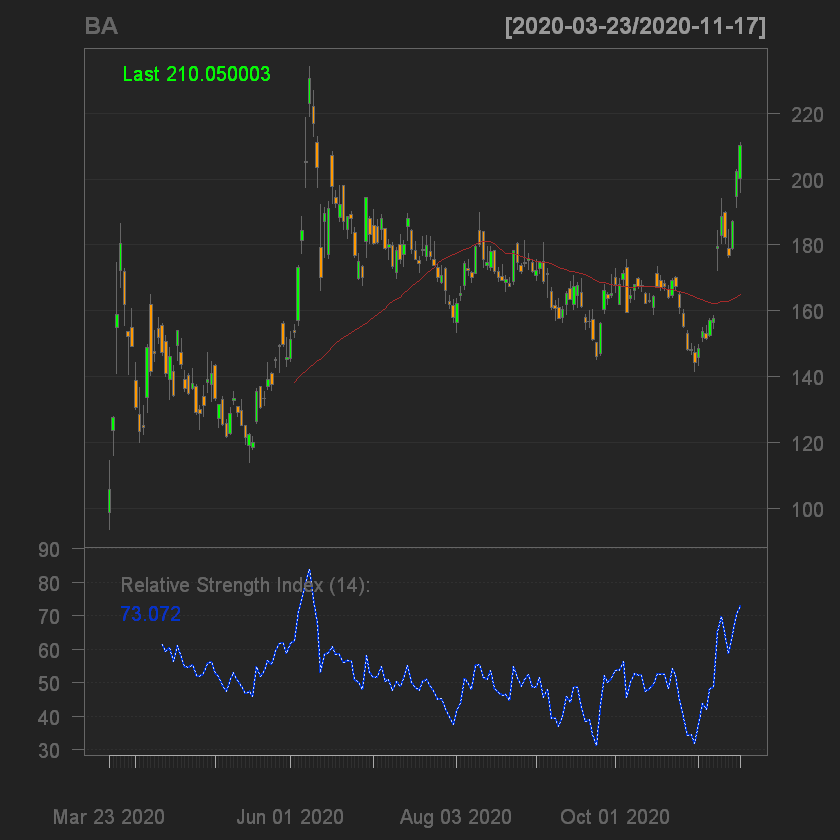

In [13]:
#Gather Stock Data
Industrials<- c("BA", "CAT", "PCAR")
getSymbols(Industrials, src = "yahoo", from = "2020-03-23", to = "2020-11-18")
candleChart(BA, TA = "addRSI();addSMA(n = 50)")

Boeing in recent months has been trading in a channel between $200 and $140. The November run-up is due to the anticipation of approval from the FAA of the 737 Max. As we can see from technical indicators like the RSI and 50-day moving average BA is in overbought conditions. The RSI is approaching the overbought condition of 75 with a score of 73.07 and the 50-day moving average has remained relatively low compared to the stocks parabolic move. Boeing likely is to consolidate around the recent high in June and the $180 price level due to the consolidation in past months. 

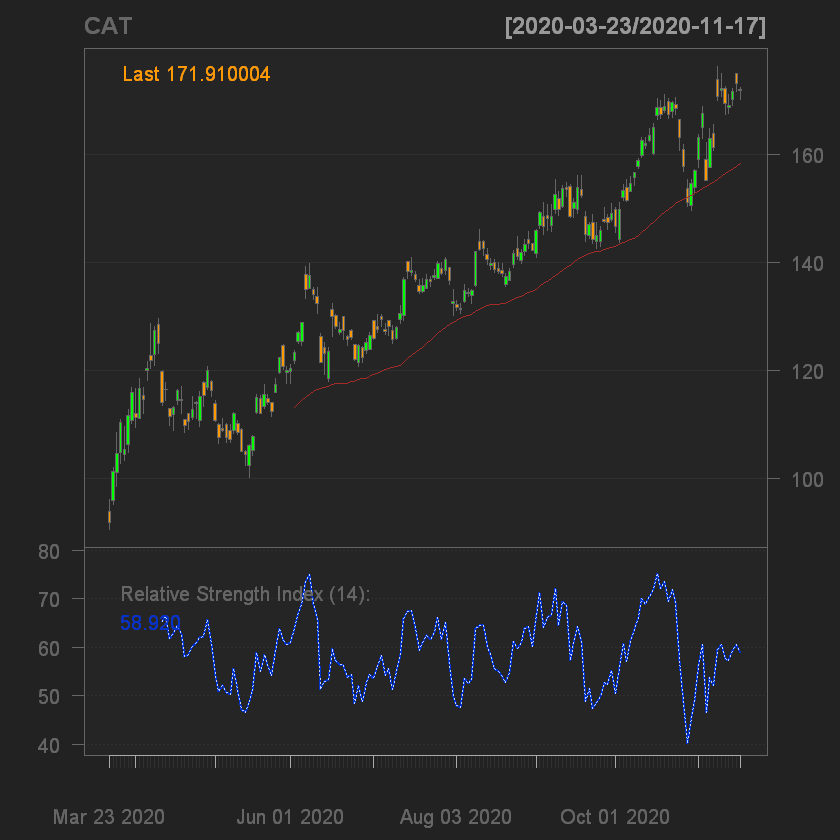

In [14]:
candleChart(CAT, TA = "addRSI();addSMA(n = 50)")

Caterpillar’s stock chart from the March low is a beautiful looking chart from a technical analysis standpoint. The chart has healthy pullbacks and consolidations followed by steady rises in stock price. The RSI would indicate Caterpillar is not overbought or oversold scoring 58. The stock has been trading in an upward channel and bounced off the 50-day moving average multiple times. It would be safe to consider the stock bouncing off the $160 price level as that is where the moving average indicated.

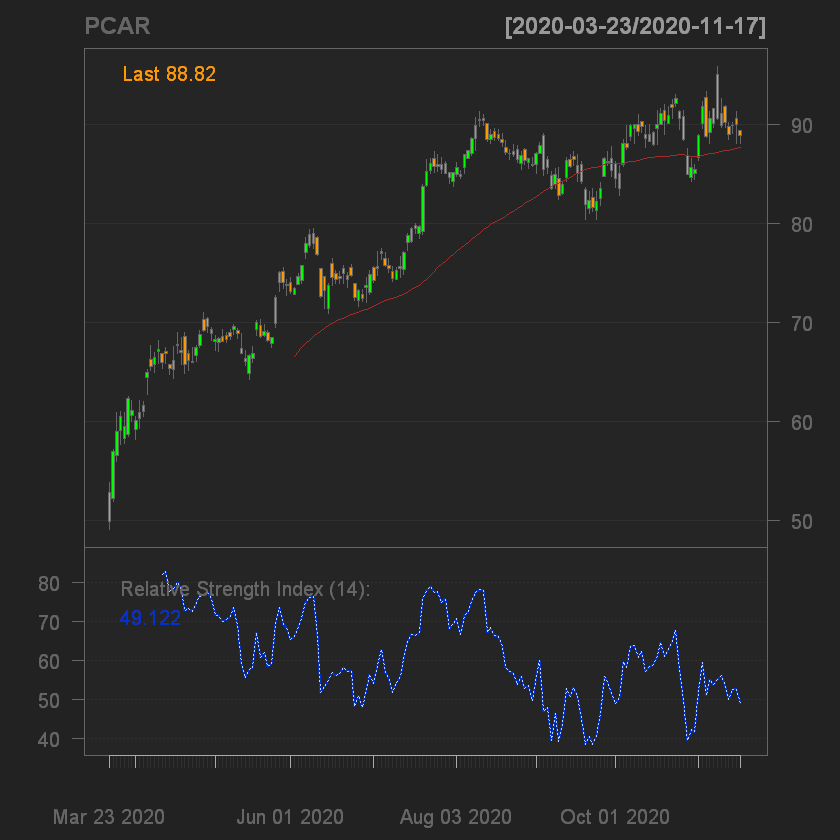

In [15]:
candleChart(PCAR, TA = "addRSI();addSMA(n = 50)")

Paccar has been a very stable investment, which comes with no surprise as the beta is 1.05. The stock has been in consolidation since July’s big move, trading between $95 on the top side and $80 on the bottom side. With consolidation comes an RSI at a neutral score of 49.12 and the 50-day moving average at current price levels. In order to break the trend-line, Paccar needs a catalyst either positive leading to the upside or negative leading into the downside. It is likely investors are waiting for upcoming earnings in 2021 to justify a stock move above previous highs. The stock is likely to remain in the channel unless a significant catalyst occurs.

## Conclusion

Our analysis has brought our attention to three names; Boeing, Caterpillar, and Paccar. It is no shock that Boeing and Caterpillar make the list as they are Dow components and blue-chip companies that should be in a diversified portfolio. Now it’s the hard part, which one is the perfect stock for the pandemic and coming out of the pandemic. I would rate Caterpillar as the best stock to offer investors the most value on a fundamental basis. This pick has a great influence from previously mentioned fundamentals, balance sheet, management team, and risks. Boeing and Paccar have some serious threats associated with them. For Boeing, they have taken on $25 Billion in debt that was issued in May. This overhang of debt puts pressure on Boeing’s management team to execute operations. Boeing may be able to execute operations perfectly however, the real test is if passengers are willing to travel during the distribution of the vaccine and will passengers refuse to fly on the 737 Max. Paccar is not the perfect stock based on the rapid increase in competition in the electric vehicle space. Paccar must make the transition to electric vehicles and fast with Tesla and other EV companies focusing on the heavy-duty trucking industry. Paccar is keeping R&D expense relatively the same as 2019, coming in at a range of $310-$340 million. The transition may cause Paccar to achieve extreme growth rates relative to their past, however, it will hinder profitability as they have to compete with a new wave of EV producers. Therefore, I am not choosing Paccar based on the moat shrinking. Caterpillar sets up to be the perfect stock among the three. If we look at revenues for Caterpillar it was stable growth and predictable, since they are diverse across the world. Caterpillar has shown in the past and during the pandemic, they have an excellent management team that can appease their investor's expectations. Caterpillar has maintained their dividend, unlike Boeing, due to the financial handling of its balance sheet. As well, Caterpillar is capable of focusing attention on profitability as they will be selling new equipment that is beneficial to the bottom line and push Caterpillar into quartile 4, thus having Caterpillar’s multiple expanding, thus increasing the stock price. From a technical standpoint, Caterpillar sets up the best for a risk-neutral investor as they are very stable and provide the most value to investors.

### Thank you for reading through my financial project, please leave any feedback in the comments below.
